<a href="https://colab.research.google.com/github/sinchanyong/chanyong/blob/main/20221107_ml_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 : 보험료 예측
1. 데이터 수집
2. 데이터 전처리
3. 모델 학습
4. 모델 평가
5. 모델 배포

In [1]:
import pandas as pd

In [3]:
#@title 데이터 수집
# https://www.kagle.com/datasets/awaiskaggler/insurance-csv
file_name = "insurance.csv" #@param{"type":"string"}
url = f'https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/{file_name}'
df = pd.read_csv(url)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.info() # Non-Null Count -> 결측치
# Dtype -> datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
# 판다스의 숫자데이터를 소수점 n자리 까지만 표시시
pd.options.display.float_format = '{:.2f}'.format # kf 에서 k는 소숫점 아래 자릿수를 의미미

In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


In [9]:
#@title 데이터 전처리
#@markdown 모델링하기 좋게 데이터를 다듬는다.

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# x: 독립변수(들), y: 종속변수(1개)
model.fit()

In [11]:
# https://www.w3schools.com/python/pandas/default.asp
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [13]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [12]:
df.smoker.eq('yes')
# df.smoker == 'yes' 도 가능하긴하다

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [16]:
df.smoker = df.smoker.eq('yes').mul(1) 
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,0,southwest,16884.92
1,18,male,33.80,1,0,southeast,1725.55
2,28,male,33.00,3,0,southeast,4449.46
3,33,male,22.70,0,0,northwest,21984.47
4,32,male,28.90,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.00,3,0,northwest,10600.55
1334,18,female,31.90,0,0,northeast,2205.98
1335,18,female,36.90,0,0,southeast,1629.83
1336,21,female,25.80,0,0,southwest,2007.95


In [17]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [19]:
df.region.nunique()

4

In [20]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
expenses    float64
dtype: object

In [27]:
df_dummy = pd.get_dummies(df, columns= ['sex', 'region'], drop_first=True)
df_dummy

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,0,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


## 데이터 전처리 (훈련셋 , 시험셋)
- 훈련을 한 것으로 모델을 시험을 하면 맞출 수밖에 없음
- 데이터의 일부를 실험셋으로 독립시켜서 , 훈련셋과 시험셋.

In [73]:
# X, y => 독립변수, 종속변수
df_dummy.tail()

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1
1337,61,29.10,0,0,29141.36,0,1,0,0


In [86]:
df_dummy.columns

Index(['age', 'bmi', 'children', 'smoker', 'expenses', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [105]:
X = df_dummy[['age', 'bmi', 'children', 'smoker', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest']]
y = df_dummy.expenses

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [108]:
# test_size : 비율 -> 테스트셋(시험셋)의 비율
# random_state : seed값 -> 임의로 결정되는 값을 특정 값으로 만드는.
# len(train_test_split(X, y, test_size = 0.2, random_state=100))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

## 모델학습


In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
model = LinearRegression()

In [111]:
model.fit(X_train, y_train)

LinearRegression()

In [122]:
# 예측
pred = model.predict(X_test)
pred

array([ 8579.53628306,  8237.76654214, 11572.38368183,  8080.14544867,
        6510.15356494, 17793.05678357, 20045.54313607,  8728.48530312,
       12661.94601547, 19999.37340325, 21119.958301  , 10224.85605213,
       16598.78080822,  9734.79975842, 13937.64151546, 12471.30813831,
       16942.22112544, 16838.96097508, 11385.43369169, 23771.42192553,
       20214.15230452,  7207.77236383, 11434.91387445, 13967.63914178,
       17046.93513612, 12696.61005364, 11753.99374644, 20148.15677389,
       11867.49458581, 18712.2606893 , 23668.95866797,  6769.85741298,
       19724.87282834,  8176.40216734, 13196.89457467, 16894.93118942,
       14420.25890396, 14463.29170829,  9741.99127309, 20401.48745946,
       11357.84437123, 16408.93982386, 11673.44849072, 13580.95778981,
        5295.55511822, 10568.57993421, 10786.78712869,  8332.65283161,
        7955.53861888, 15715.82066893, 23137.74859312, 10989.73855333,
       11545.63420414, 14352.15805003, 10703.84908073, 17076.23768604,
      

## 모델평가

In [113]:
comparison = pd.DataFrame(
    {'actual': y_test, 'pred': pred}
)
comparison

,actual,pred
12,1826.84,8579.54
306,20177.67,8237.77
318,7421.19,11572.38
815,1877.93,8080.15
157,15518.18,6510.15
...,...,...
713,1984.45,10958.07
1282,14283.46,4423.98
531,14043.48,18555.53
537,8825.09,13662.30


## 평가를 시각화

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

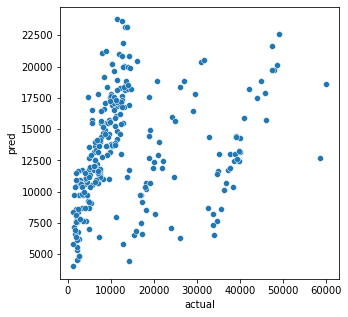

In [115]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'actual', y='pred', data = comparison)

## mean=squared_error

In [116]:
#@title mean_squared_error
from sklearn.metrics import mean_squared_error

In [117]:
# MSE
mean_squared_error(y_test , pred)

145971473.18354136

In [118]:
# RMSE
# mean_squared_error(y_test , pred) ** 0.5
mean_squared_error(y_test , pred , squared=False)

12081.86546786304

In [119]:
# R^2 : 결정계수(독립변수가 종속변수를 얼마나 잘 설명하는가?)
model.score(X_train , y_train)

0.1386193780599757

In [120]:
model.coef_

array([ 2.62911161e+02,  2.56345939e+02,  6.50712644e+02,  9.09494702e-13,
        1.18896385e+03, -1.19972646e+03,  6.18154001e+02, -1.60355572e+03])

In [121]:
pd.Series(model.coef_, index = X.columns)

age                  262.91
bmi                  256.35
children             650.71
smoker                 0.00
sex_male            1188.96
region_northwest   -1199.73
region_southeast     618.15
region_southwest   -1603.56
dtype: float64

In [123]:
model.intercept_

-5871.128836202821

## 모델 배포

In [ ]:
!pip install mlxtend

In [127]:
import joblib

joblib.dump(model, 'first_model.pkl')

['first_model.pkl']